In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import Ko

In [2]:
raw_per = pd.read_csv('../Data/ALL/Monthly/ALL_BETA_5YR_M.csv', encoding = 'cp949', header = 7, dtype = 'str')
raw_rt = pd.read_csv('../Data/ALL/Monthly/ALL_SILH_SUIK_RT_MONTHLY_NO_DIVIDEND.csv', encoding = 'cp949', header = 7, dtype = 'str')

## **전체기간 총 상장 주식 수는 5015개**

In [3]:
stock_name_ls = raw_rt.iloc[1,1:].tolist()

In [4]:
len(stock_name_ls)

5015

## **보통주만 선별하는 작업 필요**

In [5]:
stock_name_ls[:10]

['조흥은행',
 '조흥은행(1신)',
 '조흥은행(2신)',
 '동화약품',
 '동화약품공업(1신)',
 '동화약품(전환1신)',
 '동화약품(전환2신)',
 '우리은행',
 '한빛은행(1신)',
 '한국상업은행(2신)']

## **Raw 데이터에 문제가 있는 16개 기업 제거**

In [6]:
error_stock_ls = ['삼성물산','알루코','하나은행','두산건설','SK',
                  '고려시멘트','광주은행','경남은행','신성이엔지',
                  '현대리바트','세원','풀무원','국민은행','핸디소프트',
                  '아이티센', '에스와이코퍼레이션']

In [7]:
stock_name_ls = [x for x in stock_name_ls if not x in error_stock_ls]

In [8]:
def clean_uncommon_stocks(stock_name_ls):
    # (1신) 꼴 제거
    unwanted_word_ls = ['(', '1신', '2신', '3신','4신','우B','우C','1','2','3','우선','스팩']
    
    for unwanted_word in unwanted_word_ls:
        stock_name_ls = [x for x in stock_name_ls if not unwanted_word in x]
    
    stock_name_ls = [x for x in stock_name_ls if not x[-1] == '우']
    return stock_name_ls

## **최종적으로 선정된 주식의 수는 2900개**

In [9]:
common_stock_ls = clean_uncommon_stocks(stock_name_ls)
len(common_stock_ls)

2900

# 성과지표 데이터프레임 전처리 수행

In [10]:
per_df = Ko.Preprocessing(raw_per, column = '기업명', drop_limit=0)
per_df = per_df.loc[common_stock_ls]

In [11]:
len(per_df)

2900

# 수익률 DF 전처리

In [12]:
rt_df = Ko.Preprocessing(raw_rt, column = '기업명', drop_limit=0).apply(lambda x: Ko.rt_transform(x), axis = 1)

rt_df = rt_df.loc[per_df.index]
rt_df = rt_df.iloc[:, :-1]

In [13]:
rt_df.loc['조흥은행'].iloc[173:178]

20040630    0.8571
20040731    1.0000
20040831    0.0000
20040930       NaN
20041031       NaN
Name: 조흥은행, dtype: float64

In [14]:
len(rt_df)

2900

# 포트폴리오 구성 수행

In [15]:
data = Ko.portfolio_selection(per_df)

In [16]:
data.head(5)

,19900131,19900228,19900331,19900430,19900531,19900630,19900731,19900831,19900930,19901031,...,20171130,20171231,20180131,20180228,20180331,20180430,20180531,20180630,20180731,20180831
조흥은행,x,8,8,8,8,8,8,8,8,8,...,7,7,7,7,7,7,7,7,7,7
동화약품,x,3,3,3,3,2,3,2,2,2,...,0,-0.03766,0.08916,0,0,0,0,0,0,0
우리은행,x,7,8,7,7,7,8,7,8,8,...,5,6,6,6,5,5,5,6,6,4
KR모터스,x,9,9,9,9,9,9,9,9,9,...,-0.44379,-0.44379,-0.15543,0.067,0,0,0,0,0,0
경방,x,1,1,1,0,0,0,0,0,0,...,2,2,2,2,2,2,3,4,4,3


# 포트폴리오 성과분석

In [17]:
result = Ko.performance_analysis(data, rt_df)
result.index = pd.to_datetime(data.columns, format = '%Y%m%d')

In [18]:
result.min()

GROUP_0    0.701739
GROUP_1    0.710700
GROUP_2    0.687691
GROUP_3    0.674770
GROUP_4    0.699040
GROUP_5    0.677445
GROUP_6    0.696886
GROUP_7    0.656852
GROUP_8    0.643623
GROUP_9    0.622957
dtype: float64

In [19]:
result.max()

GROUP_0    1.830251
GROUP_1    1.633455
GROUP_2    1.473372
GROUP_3    1.580649
GROUP_4    1.686826
GROUP_5    1.559879
GROUP_6    1.521919
GROUP_7    1.588726
GROUP_8    1.631471
GROUP_9    1.726599
dtype: float64

# 1990년대

Text(0.5,1,'Performance result by PER Group')

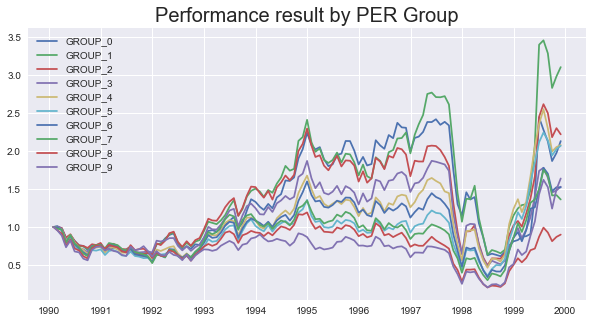

In [20]:
plt.figure(figsize = (10,5))

for column in result.columns:
    plt.plot(result[column].iloc[:119].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2000 년대

Text(0.5,1,'Performance result by PER Group')

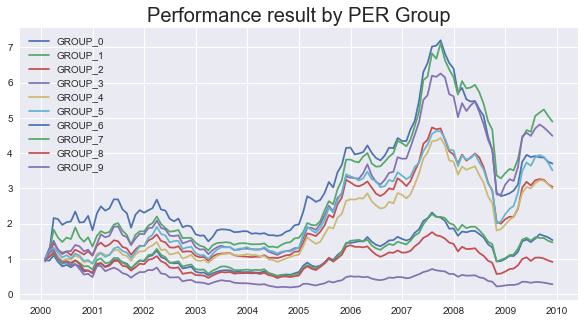

In [21]:
plt.figure(figsize = (10,5))

for column in result.columns:
    plt.plot(result[column].iloc[120:239].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2010년대

Text(0.5,1,'Performance result by PER Group')

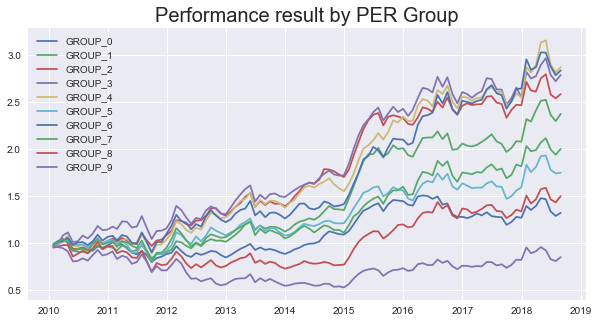

In [22]:
plt.figure(figsize = (10,5))

for column in result.columns:
    plt.plot(result[column].iloc[240:].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

Text(0.5,1,'Performance result by PER Group')

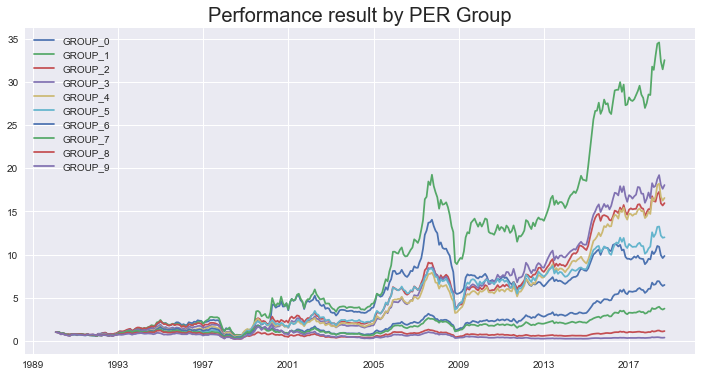

In [23]:
plt.figure(figsize = (12,6))

for column in result.columns:
    plt.plot(result[column].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

In [24]:
summary_df = result.describe().apply(lambda x: round(x,3))
summary_df.loc['count'] = result.prod().apply(lambda x: np.power(x,1/len(result)))
summary_df.rename({'count' : 'geo_mean_return',
                    'mean' : 'arith_mean_return'},
                  inplace = True)
summary_df.apply(lambda x: round(x,3))

,GROUP_0,GROUP_1,GROUP_2,GROUP_3,GROUP_4,GROUP_5,GROUP_6,GROUP_7,GROUP_8,GROUP_9
geo_mean_return,1.007,1.010,1.008,1.008,1.008,1.007,1.005,1.004,1.000,0.997
arith_mean_return,1.011,1.014,1.012,1.013,1.013,1.011,1.010,1.009,1.005,1.004
std,0.099,0.095,0.090,0.092,0.098,0.093,0.097,0.100,0.103,0.118
min,0.702,0.711,0.688,0.675,0.699,0.677,0.697,0.657,0.644,0.623
25%,0.970,0.972,0.968,0.968,0.968,0.959,0.958,0.954,0.951,0.944
50%,1.008,1.009,1.004,1.010,1.012,1.008,1.002,1.002,1.004,0.998
75%,1.039,1.052,1.052,1.052,1.056,1.056,1.058,1.056,1.052,1.057
max,1.830,1.633,1.473,1.581,1.687,1.560,1.522,1.589,1.631,1.727


In [25]:
summary_df = result.describe().apply(lambda x: round(x,3))
summary_df.loc['count'] = result.prod().apply(lambda x: np.power(x,1/len(result)))
summary_df.rename({'count' : 'geo_mean_return',
                    'mean' : 'arith_mean_return'},
                  inplace = True)
summary_df.apply(lambda x: round(x,3))

,GROUP_0,GROUP_1,GROUP_2,GROUP_3,GROUP_4,GROUP_5,GROUP_6,GROUP_7,GROUP_8,GROUP_9
geo_mean_return,1.009,1.011,1.009,1.009,1.009,1.008,1.006,1.005,1.001,0.999
arith_mean_return,1.013,1.015,1.013,1.014,1.014,1.012,1.011,1.010,1.007,1.005
std,0.100,0.095,0.091,0.092,0.098,0.093,0.097,0.100,0.104,0.118
min,0.702,0.711,0.688,0.675,0.703,0.677,0.697,0.657,0.644,0.623
25%,0.973,0.972,0.971,0.969,0.969,0.960,0.958,0.956,0.952,0.948
50%,1.008,1.010,1.006,1.012,1.012,1.009,1.005,1.004,1.004,0.998
75%,1.045,1.054,1.053,1.053,1.057,1.057,1.059,1.058,1.054,1.058
max,1.830,1.633,1.490,1.581,1.687,1.560,1.522,1.589,1.649,1.727
